<a href="https://colab.research.google.com/github/GunavathiC/ML_Algorithms/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/ecosystem_data.csv')
print(df)

      water_quality  air_quality_index  biodiversity_index  vegetation_cover  \
0         37.454012         112.092246            0.729998         63.814457   
1         95.071431          99.873629            0.184512         45.929245   
2         73.199394          52.846174            0.346640         96.449852   
3         59.865848         182.180001            0.663281         21.897845   
4         15.601864         142.987248            0.482089         58.785642   
...             ...                ...                 ...               ...   
9995      85.765599         263.111589            0.952275         75.403391   
9996      89.750884          14.044187            0.747824         76.452694   
9997      94.670792          91.109541            0.019456         26.956943   
9998      39.748799         132.996002            0.401005         43.431977   
9999      21.714040          51.679444            0.257398         48.742370   

       soil_ph ecosystem_health  
0    

In [3]:
df['ecosystem_health'].value_counts

<bound method IndexOpsMixin.value_counts of 0       degraded
1       degraded
2       degraded
3       degraded
4       degraded
          ...   
9995    degraded
9996     at risk
9997    degraded
9998    degraded
9999    degraded
Name: ecosystem_health, Length: 10000, dtype: object>

In [4]:
df['ecosystem_health'] = df['ecosystem_health'].map({'healthy':0, 'degraded':2, 'unhealthy':3})

In [6]:
x=df[['water_quality','air_quality_index','biodiversity_index','vegetation_cover','soil_ph']]
y=df['ecosystem_health']

In [7]:
x

,water_quality,air_quality_index,biodiversity_index,vegetation_cover,soil_ph
0,37.454012,112.092246,0.729998,63.814457,5.144016
1,95.071431,99.873629,0.184512,45.929245,4.021498
2,73.199394,52.846174,0.346640,96.449852,4.194976
3,59.865848,182.180001,0.663281,21.897845,4.493691
4,15.601864,142.987248,0.482089,58.785642,4.620093
...,...,...,...,...,...
9995,85.765599,263.111589,0.952275,75.403391,6.923449
9996,89.750884,14.044187,0.747824,76.452694,4.744065
9997,94.670792,91.109541,0.019456,26.956943,7.619473
9998,39.748799,132.996002,0.401005,43.431977,6.365560


In [8]:
y

,ecosystem_health
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0
...,...
9995,2.0
9996,NaN
9997,2.0
9998,2.0


In [15]:
# Drop rows with NaN values in y_train
nan_mask = y_train.isna()
x_train = x_train[~nan_mask]
y_train = y_train[~nan_mask]

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [16]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [17]:
y_pred = model.predict(x_test)
y_pred

array([2., 2., 2., ..., 2., 2., 2.])

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9992962702322308


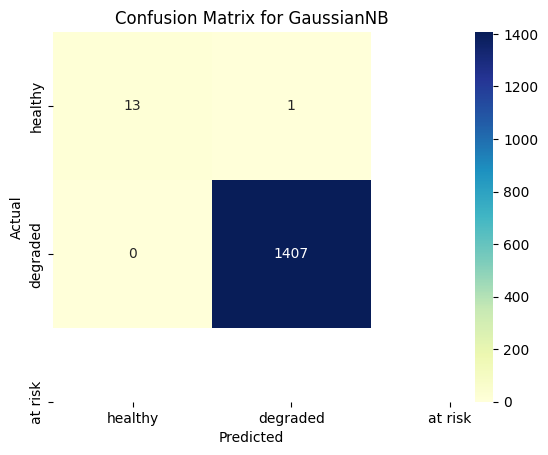

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['healthy', 'degraded', 'at risk'],
            yticklabels=['healthy', 'degraded', 'at risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for GaussianNB')
plt.show()